In [98]:
import pandas as pd
import numpy as np
import itertools
import os

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

import statsmodels.api as sm

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns


directory_raw = 'C:/Users/SARDAA1/Documents/Untitled Folder/USA/raw data'


In [80]:
df_price_parities = pd.read_csv (os.path.join(directory_raw, 'State Data.csv'), skiprows = 3)

df_price_parities = df_price_parities[df_price_parities['LineCode'] == 1]
df_price_parities = df_price_parities[~df_price_parities['GeoFips'].isin(['00000', '00999'])]
df_price_parities = df_price_parities[df_price_parities['Description'] == 'RPPs: All items']

df_price_parities

,GeoFips,GeoName,LineCode,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,01000,Alabama,1.0,RPPs: All items,88.852,87.725,89.682,89.955,90.515,90.273,90.137,89.706,90.580,90.098,87.388,88.326,87.581,88.026,87.776
10,02000,Alaska,1.0,RPPs: All items,103.924,106.224,103.183,103.328,102.597,102.079,102.412,103.331,104.075,104.864,104.552,103.063,101.339,104.776,101.989
15,04000,Arizona,1.0,RPPs: All items,102.501,102.847,100.548,99.081,98.044,98.415,97.934,97.871,98.588,97.873,97.344,97.759,99.211,96.615,99.897
20,05000,Arkansas,1.0,RPPs: All items,88.065,86.330,88.492,89.335,89.354,89.445,89.357,88.980,89.275,88.607,87.156,87.730,88.228,88.927,86.597
25,06000,California,1.0,RPPs: All items,111.187,110.629,109.665,109.472,109.649,109.638,109.887,110.644,109.866,110.925,111.972,111.082,111.876,111.886,112.470
30,08000,Colorado,1.0,RPPs: All items,103.302,102.351,100.594,103.391,103.152,103.118,103.076,103.084,102.713,102.957,100.290,102.488,103.814,102.877,102.293
35,09000,Connecticut,1.0,RPPs: All items,110.466,110.829,107.003,107.870,107.542,107.703,107.010,107.612,107.521,107.180,104.057,103.877,105.118,102.751,106.412
40,10000,Delaware,1.0,RPPs: All items,100.826,102.125,101.547,100.392,99.530,98.591,99.704,97.946,98.499,98.564,99.260,98.867,96.774,97.469,97.957
45,11000,District of Columbia,1.0,RPPs: All items,112.385,113.041,114.189,114.103,111.696,113.585,114.291,113.386,112.475,110.087,111.510,109.247,110.895,111.658,112.847
50,12000,Florida,1.0,RPPs: All items,101.657,100.459,100.332,100.816,101.046,100.718,100.856,101.256,101.055,100.871,100.315,99.701,100.580,101.409,102.144


In [81]:
df_long = pd.melt(df_price_parities, id_vars=['GeoFips', 'GeoName', 'LineCode', 'Description'], var_name='Year', value_name='CPI')

df_long = df_long[df_long['GeoName'] != 'Twin Falls, ID (Metropolitan Statistical Area) *']
df_long = df_long[df_long['GeoName'] != 'Poughkeepsie-Newburgh-Middletown, NY (Metropolitan Statistical Area) *']

df_long = df_long[['GeoName','GeoFips', 'Year', 'CPI']]
df_long = df_long[df_long['CPI'] != '(NA)']

In [82]:
df_long2 = df_long
df_merged = df_long.merge(df_long2, on='Year')
df_merged = df_merged[df_merged['GeoName_x'] != df_merged['GeoName_y']]
df_merged['rer'] = df_merged['CPI_y'].apply(lambda x: float(x)) / df_merged['CPI_x'].apply(lambda x: float(x))

df_merged['id'] = df_merged['GeoName_x'] + df_merged['GeoName_y'] 

df_merged['log_rer'] =  np.log(df_merged['rer'])
df_merged.set_index(['id', 'Year'], inplace=True)
df_merged['diff_q'] = df_merged.groupby(level=0)['log_rer'].diff(periods=1)


In [83]:
df_consumption = pd.read_csv (os.path.join(directory_raw, 'Consumption Per State.csv'), skiprows = 3)
df_consumption.drop(df_consumption.tail(3).index,inplace=True)
df_consumption['GeoFips'] = df_consumption['GeoFips'].astype(float)

df_consumption = df_consumption[df_consumption['GeoFips'] < 57000]
df_consumption = df_consumption[df_consumption['GeoName'] != 'United States']


In [103]:
df_long_consumption = pd.melt(df_consumption, id_vars=['GeoFips', 'GeoName'], var_name='Year', value_name='Consumption')
df_long_consumption['Consumption'] = df_long_consumption['Consumption'].astype(float)

df_long_consumption['log_consumption'] =  np.log(df_long_consumption['Consumption'])

df_long_consumption['YEAR'] = df_long_consumption['Year']

df_long_consumption.set_index(['GeoFips', 'Year'], inplace=True)
df_long_consumption['diff'] = df_long_consumption.groupby(level=0)['log_consumption'].diff(periods=1)



In [104]:
df_long_consumption2 = df_long_consumption
df_merged_consumption = df_long_consumption.merge(df_long_consumption2, on='Year')
df_merged_consumption = df_merged_consumption[df_merged_consumption['GeoName_x'] != df_merged_consumption['GeoName_y']]
df_merged_consumption['consumption_ratio'] = np.log(df_merged_consumption['Consumption_x'].apply(lambda x: float(x))) - np.log(df_merged_consumption['Consumption_y'].apply(lambda x: float(x)))


df_merged_consumption

,GeoName_x,Consumption_x,log_consumption_x,YEAR_x,diff_x,GeoName_y,Consumption_y,log_consumption_y,YEAR_y,diff_y,consumption_ratio
Year,,,,,,,,,,,
1997,Alabama,17609.0,9.776165,1997,NaN,Alaska,23213.0,10.052468,1997,NaN,-0.276302
1997,Alabama,17609.0,9.776165,1997,NaN,Arizona,20364.0,9.921524,1997,NaN,-0.145359
1997,Alabama,17609.0,9.776165,1997,NaN,Arkansas,16074.0,9.684958,1997,NaN,0.091207
1997,Alabama,17609.0,9.776165,1997,NaN,California,20988.0,9.951706,1997,NaN,-0.175541
1997,Alabama,17609.0,9.776165,1997,NaN,Colorado,22341.0,10.014179,1997,NaN,-0.238013
...,...,...,...,...,...,...,...,...,...,...,...
2022,Wyoming,52403.0,10.866719,2022,0.070046,Vermont,55743.0,10.928507,2022,0.085071,-0.061788
2022,Wyoming,52403.0,10.866719,2022,0.070046,Virginia,52057.0,10.860095,2022,0.081076,0.006625
2022,Wyoming,52403.0,10.866719,2022,0.070046,Washington,56567.0,10.943181,2022,0.081206,-0.076462


In [105]:
df_merged_consumption['dc'] = df_merged_consumption['diff_x'] - df_merged_consumption['diff_y']

In [106]:
df_final = pd.merge(df_merged, df_merged_consumption, on = ['GeoName_x', 'GeoName_y', 'Year'], how='inner')
df_final.dropna(inplace=True)
df_final

,GeoName_x,GeoFips_x,CPI_x,GeoName_y,GeoFips_y,CPI_y,rer,log_rer,diff_q,Consumption_x,log_consumption_x,YEAR_x,diff_x,Consumption_y,log_consumption_y,YEAR_y,diff_y,consumption_ratio,dc
Year,,,,,,,,,,,,,,,,,,,
2009,Alabama,01000,87.725,Alaska,02000,106.224,1.210875,0.191343,0.034655,26958.0,10.202035,2009,-0.021904,38871.0,10.568004,2009,-0.001029,-0.365968,-0.020875
2009,Alabama,01000,87.725,Arizona,04000,102.847,1.172380,0.159036,0.016135,26958.0,10.202035,2009,-0.021904,30090.0,10.311948,2009,-0.044397,-0.109913,0.022493
2009,Alabama,01000,87.725,Arkansas,05000,86.330,0.984098,-0.016030,-0.007133,26958.0,10.202035,2009,-0.021904,25712.0,10.154713,2009,-0.016777,0.047322,-0.005127
2009,Alabama,01000,87.725,California,06000,110.629,1.261089,0.231975,0.007734,26958.0,10.202035,2009,-0.021904,33919.0,10.431731,2009,-0.042143,-0.229695,0.020239
2009,Alabama,01000,87.725,Colorado,08000,102.351,1.166726,0.154201,0.003516,26958.0,10.202035,2009,-0.021904,34335.0,10.443921,2009,-0.031563,-0.241885,0.009659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,Wyoming,56000,91.903,Vermont,50000,101.096,1.100029,0.095337,0.020373,52403.0,10.866719,2022,0.070046,55743.0,10.928507,2022,0.085071,-0.061788,-0.015025
2022,Wyoming,56000,91.903,Virginia,51000,102.137,1.111357,0.105581,-0.006393,52403.0,10.866719,2022,0.070046,52057.0,10.860095,2022,0.081076,0.006625,-0.011030
2022,Wyoming,56000,91.903,Washington,53000,109.849,1.195271,0.178373,0.004823,52403.0,10.866719,2022,0.070046,56567.0,10.943181,2022,0.081206,-0.076462,-0.011160


In [107]:
X = df_final[['diff_q']]
Y= df_final[['dc']]
X = sm.add_constant(X)
model1 = sm.OLS (Y, X).fit()
coefficients1 = model1.params
coefficients1

const    -4.065758e-20
diff_q   -1.206133e-01
dtype: float64

In [108]:
diff_q = df_final['diff_q'].values
dc = df_final['dc'].values

cor = pearsonr (diff_q, dc)
cor

PearsonRResult(statistic=-0.16850110155667147, pvalue=1.3242314435023032e-225)

<Axes: xlabel='diff_q', ylabel='dc'>

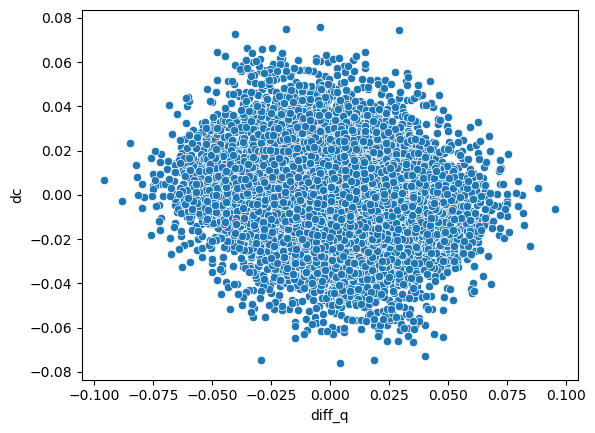

In [109]:
sns.scatterplot (data = df_final, x = 'diff_q', y = 'dc')

In [111]:
#Accounting for Time Fixed Effects

year_dummies = pd.get_dummies(df_final['YEAR_x'])

# Concatenate original X with year dummies
X = pd.concat([X, year_dummies], axis=1)

model = sm.OLS(Y, X).fit()
coefficients = model.params
coefficients

const    -2.815741e+09
diff_q   -1.205241e-01
2009     -2.727248e+09
2010     -1.251017e+09
2011     -1.181829e+10
2012      1.571171e+10
2013      2.028504e+08
2014     -1.840398e+09
2015      3.295313e+09
2016     -1.944148e+10
2017     -4.667175e+09
2018      4.036032e+10
2019      3.173190e+10
2020      1.859532e+10
2021      9.075661e+09
2022      7.848959e+09
2009      5.542989e+09
2010      4.066757e+09
2011      1.463403e+10
2012     -1.289597e+10
2013      2.612890e+09
2014      4.656138e+09
2015     -4.795725e+08
2016      2.225722e+10
2017      7.482916e+09
2018     -3.754458e+10
2019     -2.891616e+10
2020     -1.577958e+10
2021     -6.259920e+09
2022     -5.033218e+09
dtype: float64

In [112]:
# Next step involves would remove net_transfers from consumption data and rerun
# BEA STATE LEVEL PERSONAL INCOME. INCOME BY PUBLIC TRANSFERS.